# Importdando e Concatenando

In [263]:
import pandas as pd

In [264]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')


In [265]:
# Variável frame que irá atribuir uma lisca com duas liastas dos imports anteriores
frame = [nomes_f, nomes_m]

In [266]:
# Variável que irá concatenar a lista frame, transformar em uma data frame e retornar apenas os nomes
nomes = pd.concat(frame)['nome'].to_frame()

In [267]:
# Retorna 5 nomes aleatórios dentro do dataframe
nomes.sample(5)

,nome
104,REINALDO
61,BIANCA
185,SHEILA
23,LARISSA
76,TATIANE


# Inserindo nova váriavel ID aleatória

In [268]:
import numpy as np
np.random.seed(123)

In [269]:
nomes['id_aluno'] = np.random.permutation(len(nomes)) + 1

In [270]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


## Inserindo Variável E-mail

In [271]:
# Definindo o dominio do email
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, len(nomes))

In [272]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [273]:
# Inserindo no Data Frame 'nomes' a concatenação dos dados da coluna nome com o domínio do e-mail
nomes['e-mail'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [274]:
nomes.sample(5)

,nome,id_aluno,dominio,e-mail
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a Tabela Cursos

In [275]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [276]:
import html5lib

In [277]:
cursos = pd.read_html(url)

In [278]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [279]:
# transforma em um data frame
cursos = cursos[0]

In [280]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [281]:
type(cursos)

pandas.core.frame.DataFrame

In [282]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o Index deos Cursos

In [283]:
cursos.rename(columns = {'Nome do curso': 'nome_do_curso'}, inplace = True)

In [284]:
# Adicionando ID

In [285]:
cursos['id_cursos'] = cursos.index + 1

In [286]:
cursos.head()

,nome_do_curso,id_cursos
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [287]:
# Atribui ao index do data frame o valor id_cursos
cursos.set_index('id_cursos', inplace = True)

In [288]:
cursos.head()

,nome_do_curso
id_cursos,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [289]:
nomes.sample(5)

,nome,id_aluno,dominio,e-mail
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


# Matriculando os alunos nos cursos

In [290]:
# Faz com que cada aluno receba uma quantidade de matrículas, onde varios alunos teram 1 matricula, alguns 2 e poucos mais de 2
nomes['matricula'] = np.ceil(np.random.exponential(size = len(nomes))).astype(int)

In [291]:
nomes

,nome,id_aluno,dominio,e-mail,matricula
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,3
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br,1


In [292]:
nomes['matricula'].describe()

count    400.000000
mean       1.657500
std        1.050215
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: matricula, dtype: float64

In [293]:
import seaborn as sns

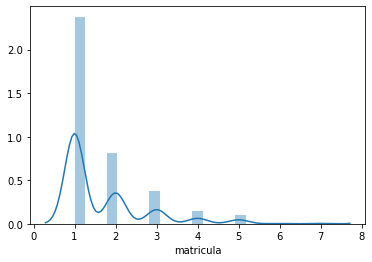

In [294]:
sns.distplot(nomes.matricula)

In [295]:
nomes.matricula.value_counts()

1    248
2     85
3     39
4     15
5     11
7      1
6      1
Name: matricula, dtype: int64

# Selecionando Cursos

In [296]:
# Lista vazia que irá receber o ide do aluno, e os cursos de acordo com a quantidade de matrículas, de acordo com a prob de x
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [297]:
# loop para percorrer o data frame 'nomes' e identificar o ID_Alunos e a quantidade de Matriculas
# 'id' irá receber o valor do ID_Aluno
# 'matriculas' irá receber o valor de Matricula
# Loop que define irá dar ao ID a probabilidade do curso e atruir a lista todas_matriculas
# 'matriculas' Data Frame dos ID_Alunos e os cursos recebidos de acordo com a quantidade de matriculas encontradas
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matricula
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [298]:
matriculas.head(10)

,id_aluno,id_curso
0,235,7
1,43,7
2,43,17
3,43,8
4,304,19
5,156,17
6,343,15
7,310,16
8,310,13
9,55,6


In [299]:
# Faz um agrupamento po Curso e faz um count em quantidade de alunos por curso, e renomeio o ID_Aluno por quantidade de alunos
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

In [300]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,33,Lógica de programação
2,3,Java para Web
3,6,C# para Web
4,21,Ruby on Rails
5,20,Cursos de Python


In [301]:
matriculas.head()

,id_aluno,id_curso
0,235,7
1,43,7
2,43,17
3,43,8
4,304,19


In [302]:
nomes.head()

,nome,id_aluno,dominio,e-mail,matricula
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,3
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1


In [303]:
cursos.head()

,nome_do_curso
id_cursos,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Exportando dados

In [304]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [305]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,33,Lógica de programação
1,3,Java para Web
2,6,C# para Web
3,21,Ruby on Rails
4,20,Cursos de Python
5,16,PHP com MySql
6,50,.NET para web
7,42,Novas integrações com Java
8,43,TDD com Java
9,37,Código limpo com C#


In [306]:
matriculas_json = matriculas_por_curso.to_json()

In [307]:
matriculas_html = matriculas_por_curso.to_html()

# Criando o Banco SQL

In [308]:
from sqlalchemy import create_engine, MetaData, Table

In [309]:
# Engine do sqlite
engine = create_engine('sqlite:///:memory:')

In [310]:
engine

Engine(sqlite:///:memory:)

In [311]:
type(engine)

sqlalchemy.engine.base.Engine

In [312]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,33,Lógica de programação
2,3,Java para Web
3,6,C# para Web
4,21,Ruby on Rails
5,20,Cursos de Python


In [313]:
# Criando a tabela no banco de dados
matriculas_por_curso.to_sql('matriculas', engine)

In [314]:
# Retornando o nome das taelas no sqlite
print(engine.table_names())

['matriculas']


# Buscando Dados no Banco SQL

In [315]:
# select sql
query = 'SELECT * FROM matriculas WHERE quantidade_de_alunos < 20'

In [316]:
# Retornando o select
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,3,Java para Web
1,3,6,C# para Web
2,6,16,PHP com MySql
3,12,15,Hardware básico
4,18,17,Programação funcional
5,20,11,Orientação objetos com Java


In [317]:
# Retornando a tabela completa
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [318]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,33
1,Java para Web,3
2,C# para Web,6
3,Ruby on Rails,21
4,Cursos de Python,20
5,PHP com MySql,16
6,.NET para web,50
7,Novas integrações com Java,42
8,TDD com Java,43
9,Código limpo com C#,37


In [319]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

In [320]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
13,Desenvolvendo jogos,67
14,Análise de dados,65
18,Boas práticas em Java,66


# Salvando nova tabela no banco de dados

In [321]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [322]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes Dos Alunos(a) da Próxima Turma

In [323]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,33,Lógica de programação
2,3,Java para Web
3,6,C# para Web
4,21,Ruby on Rails
5,20,Cursos de Python
6,16,PHP com MySql
7,50,.NET para web
8,42,Novas integrações com Java
9,43,TDD com Java


In [324]:
# Escolhendo o curso

In [325]:
matriculas

,id_aluno,id_curso
0,235,7
1,43,7
2,43,17
3,43,8
4,304,19
...,...,...
658,323,17
659,383,14
660,366,1
661,366,16


In [326]:
id_curso = 16

In [328]:
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
7,310,16
11,288,16
23,347,16
37,16,16
38,16,16
50,242,16
52,242,16
67,76,16
70,296,16
86,276,16


In [330]:
nomes.sample(3)

,nome,id_aluno,dominio,e-mail,matricula
45,ANDREIA,37,@dominiodoemail.com.br,andreia@dominiodoemail.com.br,1
152,LARA,160,@dominiodoemail.com.br,lara@dominiodoemail.com.br,1
18,RAIMUNDO,70,@dominiodoemail.com.br,raimundo@dominiodoemail.com.br,1


In [331]:
# Juntando duas tabelas com referencia entre os id's da tabela 'nomes' e da tabela proxima_turma
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,e-mail,matricula
id_aluno,,,,,
2,16,CESAR,@dominiodoemail.com.br,cesar@dominiodoemail.com.br,5
3,16,VALDEMIR,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br,1
4,16,MOISES,@servicodoemail.com,moises@servicodoemail.com,2
8,16,IRACI,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,1
16,16,CLAUDIA,@servicodoemail.com,claudia@servicodoemail.com,6
16,16,CLAUDIA,@servicodoemail.com,claudia@servicodoemail.com,6
21,16,BIANCA,@servicodoemail.com,bianca@servicodoemail.com,3
24,16,JOAO,@servicodoemail.com,joao@servicodoemail.com,3
31,16,VILMA,@servicodoemail.com,vilma@servicodoemail.com,1


In [332]:
# Retornando apenas a lista de nomes 
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
2           CESAR
3        VALDEMIR
4          MOISES
8           IRACI
16        CLAUDIA
16        CLAUDIA
21         BIANCA
24           JOAO
31          VILMA
47     ALESSANDRO
48         ALISON
60         FLAVIA
60         FLAVIA
72       GABRIELE
76      JAQUELINE
90       CLEONICE
91         LORENA
108         LUIZA
110       OSVALDO
113        FELIPE
125          LUIS
127       JONATAN
147      VINICIOS
148         THAIS
148         THAIS
151        TEREZA
162        RAFAEL
166        ROSANA
169        GERSON
179          TAIS
181        MOACIR
202         ESTER
242         SONIA
242         SONIA
266         CELSO
269        MURILO
273         ALICE
274      VERONICA
276         LUZIA
288      FERNANDA
296       DANIELA
305        ADEMIR
307        VALDIR
309        MATEUS
310       JULIANA
324        MARINA
331          JOSE
336       RICARDO
347       LETICIA
351       EMANUEL
359       ARNALDO
360         ELIAS
364       ROBERTO
366       GEOVANE
371        MILENA
3

In [333]:
# Transforma toda a lista em um frame
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
2,CESAR
3,VALDEMIR
4,MOISES
8,IRACI
16,CLAUDIA
16,CLAUDIA
21,BIANCA
24,JOAO
31,VILMA


In [334]:
# Localisando o id definido anteriormente na base de dados cursos 
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [335]:
# atribuindo a variável apenas o nome do curso 
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [336]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [342]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [344]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
162,RAFAEL
60,FLAVIA
179,TAIS
16,CLAUDIA
371,MILENA


# Exportando a base de dados

In [345]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [346]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,CESAR
1,VALDEMIR
2,MOISES
3,IRACI
4,CLAUDIA
5,CLAUDIA
6,BIANCA
7,JOAO
8,VILMA
9,ALESSANDRO
